In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-dotenv 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyodbc  

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

In [6]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('./password.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("user")
password = environment_variables.get("password")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [7]:
print(database)

dapDB


In [8]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [9]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query, connection)


In [10]:
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [11]:
query1 = "Select * from dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query1, connection)


In [12]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [13]:
data2021.shape

(1209, 9)

In [14]:
data2020.shape

(1055, 10)

In [15]:
data2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


# Hypothesis Test

H0:All companies get funding equally
H1:Tech company get more fnding than other companies 
H0:Sum of total funding was equal every year
H1:Sum of total funding increased yearly
H0:all cities received equal funding
H1:Big cities received a higher funding compared to subsequent cities
H0:Founders didn't in two or more fintech
H1:Founders weren't restricted on the number of company
H0:most funded companies were founded after 2014
H1:some companies were founded before 2014


In [16]:
data2019=pd.read_csv('startup_funding2019.csv')
data2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [17]:
data2018=pd.read_csv('startup_funding2018.csv')
data2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [18]:
data2018.shape

(526, 6)

# BUSINESS UNDERSTANDING

The analysis of Indian startup funding from 2018 to 2021 aims to provide insights into the funding landscape of the Indian startup ecosystem during this period. This information is valuable for various stakeholders, including investors, entrepreneurs, policymakers, and researchers, who seek to understand the trends, patterns, and opportunities in the Indian startup funding ecosystem.
By examining the funding amounts, sectors, and funding rounds, we can gain a comprehensive understanding of the areas that attracted significant investments and the stages at which startups received funding. This analysis helps identify the sectors that have experienced substantial growth and those that may present potential investment opportunities.

# DATA UNDERSTANDING
The data describes Indian startup funding trends from 2018 to 2021. It includes information on the funding amounts received by startups in various sectors, such as technology, e-commerce, healthcare, and finance. The dataset comprises details on funding rounds, including seed, angel, Series A, Series B, and later-stage funding. It also captures the funding sources, such as venture capital firms, angel investors, and corporate investors. The dataset provides insights into the geographical distribution of funded startups across major cities in India. It aims to analyze the growth and patterns of startup funding in India over the specified period.

# Data Cleaning 

## 2021 Datasets

In [19]:
data2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [20]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [103]:
null_values=data2021.isna().sum()
null_values

Company_Brand    0
Founded          0
HeadQuarter      1
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [22]:
#fill the founded column with the mean
data2021['Founded'].fillna(data2021['Founded'].mean(),inplace=True)

In [23]:
import numpy as np

data2021['Amount'] = data2021['Amount'].str.replace(r'[$,]', '', regex=True)
data2021['Amount'] = pd.to_numeric(data2021['Amount'], errors='coerce').astype(float)


In [24]:
data2021['Amount']

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1209, dtype: float64

Matplotlib is building the font cache; this may take a moment.


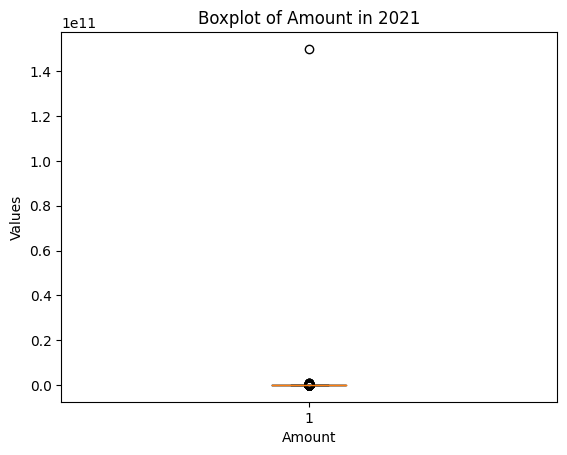

In [57]:
import matplotlib.pyplot as plt

# Create the boxplot
plt.boxplot(data2021['Amount'])

# Add a title and labels to the plot
plt.title("Boxplot of Amount in 2021")
plt.xlabel("Amount")
plt.ylabel("Values")

# Display the plot
plt.show()


In [56]:
pip install matplotlib

                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB 1.3 MB/s eta 0:00:06
                                              0.0/7.5 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.5 MB 558.5 kB/s eta 0:00:14
                                              0.1/7.5 MB 652.2 kB/s eta 0:00:12
                                              0.1/7.5 MB 652.2 kB/s eta 0:00:12
                                              0.2/7.5 MB 538.9 kB/s eta 0:00:14
     -                                        0.2/7.5 MB 621.6 kB/s eta 0:00:12
     -                                        0.2/7.5 MB 625.8 kB/s eta 0:00:12
     -                                        0.3/7.5 MB 654.2 kB/s eta 0:00:12
     -                                        0.3/7.5 MB 676.7 kB/s eta 0:00:11
     -                                        0.4/7.5 MB 742.3 kB/s eta 0:00:10
     -                                        0.4/7.5

In [25]:
data2021['Amount'].fillna(data2021['Amount'].median(),inplace=True)

In [26]:
data2021.duplicated().sum()

19

In [27]:
data2021.drop_duplicates(inplace=True)

In [28]:
data2021['Stage'].fillna(data2021['Stage'].mode()[0], inplace=True)



In [31]:
default_Founders = 'Unknown'
data2021['Founders'] = data2021['Founders'].fillna(default_Founders)

In [36]:
default_investor = 'Unknown'
data2021['Investor'] = data2021['Investor'].fillna(default_investor)

# 2020 Dataset

In [60]:
null_values2020=data2020.isna().sum()
null_values2020

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [38]:
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [47]:
data2020['Stage'].value_counts

<bound method IndexOpsMixin.value_counts of 0             None
1         Pre-seed
2         Pre-seed
3             None
4             None
           ...    
1050          None
1051    Seed Round
1052          None
1053      Series C
1054      Series A
Name: Stage, Length: 1055, dtype: object>

In [34]:
data2020['Amount'].fillna(data2020['Amount'].median(),inplace=True)

In [35]:
#fill the founded column with the mean
data2020['Founded'].fillna(data2020['Founded'].mean(),inplace=True)

In [37]:
data2020['Sector'].fillna(data2020['Sector'].mode()[0], inplace=True)



In [39]:
data2020.drop('column10', axis=1, inplace=True)

In [50]:
data2020['Stage'].fillna(data2020['Stage'].mode()[0], inplace=True)

In [52]:
default_investor = 'Unknown'
data2020['Investor'] = data2020['Investor'].fillna(default_investor)

In [54]:
default_Founders = 'Unknown'
data2020['Founders'] = data2020['Founders'].fillna(default_Founders)

In [59]:
default_HeadQuarter = 'India'
data2020['HeadQuarter'] = data2020['HeadQuarter'].fillna(default_HeadQuarter)

# 2019 Dataset

In [64]:
data2019.shape

(89, 9)

In [102]:
data2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,India,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series A
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Series A


In [101]:
data2019.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [73]:
data2019['Founded'].fillna(data2019['Founded'].mean(),inplace=True)

In [100]:
data2019['Stage'].fillna(data2019['Stage'].mode().iloc[0], inplace=True)

In [75]:
default_HeadQuarter = 'India'
data2019['HeadQuarter'] = data2019['HeadQuarter'].fillna(default_HeadQuarter)

In [83]:
data2019.iloc[:89]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,India,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series A
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2015.0,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [89]:
data2019.loc[data2019['Sector'].isnull()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
41,VMate,2015.0,India,NaN,A short video platform,NaN,Alibaba,"$100,000,000",NaN
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A
56,KredX,2015.0,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B
57,m.Paani,2015.0,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A


In [95]:
data2019.loc[41, 'Sector'] = 'Media & Entertainment market'
data2019.loc[49, 'Sector'] = 'HR Tech'
data2019.loc[52, 'Sector'] = 'Ed Tech'
data2019.loc[56, 'Sector'] = 'FinTech'
data2019.loc[57, 'Sector'] = 'Ecommerce'
data2019['Sector'].fillna('Unknown', inplace=True)

In [97]:
default_Founders = 'unknown'
data2019['Founders'] = data2019['Founders'].fillna(default_Founders)

# 2018 Datasets

In [104]:
data2018.shape

(526, 6)

In [105]:
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [106]:
data2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64